<a href="https://colab.research.google.com/github/mrDonoghue/ADS-Block1-2223/blob/main/nb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
* [go here for live instructions](https://docs.google.com/document/d/1Xtir6QuaGYkSYsbpLFpuMwUUNNEGsWmtLhDk1k3bR8g/edit?usp=sharing)

# Math

## Linear algebra
* Physics student perspective of vector: arrow with direction and magnitude/length
* CS student perspective of vector: array/list of numbers
* scalar: just a number, you silly billy
* 2 fundamental things we do to vectors:
  - add 2 vectors
  - multiply a vector by a scalar

* Give an example of each of the above


# Ethics
* [Algorithm cuts healthcare](https://www.theverge.com/2018/3/21/17144260/healthcare-medicaid-algorithm-arkansas-cerebral-palsy)
* [Youtube and conspiracy theories](https://www.nytimes.com/2019/02/19/technology/youtube-conspiracy-stars.html)
* [Biased facial recognition](https://www.theverge.com/2019/1/25/18197137/amazon-rekognition-facial-recognition-bias-race-gender)



# Case study
* Topic: TODO
* Link: TODO
* One sentence summary: TODO
* Who was harmed?: TODO
* Notes:
 - TODO
 - TODO
 - TODO
* Thoughts:
  - TODO
  - TODO
  - TODO
* Questions:
  - TODO
  - TODO
  - TODO

# Coding

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 36.4 MB/s 
     |████████████████████████████████| 5.3 MB 5.4 MB/s 
     |████████████████████████████████| 441 kB 43.6 MB/s 
     |████████████████████████████████| 163 kB 47.4 MB/s 
     |████████████████████████████████| 115 kB 44.9 MB/s 
     |████████████████████████████████| 212 kB 46.3 MB/s 
     |████████████████████████████████| 127 kB 43.8 MB/s 
     |████████████████████████████████| 7.6 MB 48.3 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import random
matplotlib.rc('image', cmap='Greys_r')

In [3]:
num_rows = 200
num_cols = 100
vecs = [random.choices(range(5), k=num_cols)
 for _ in range(num_rows)]
print(len(vecs[0]))

100


In [4]:
def multiply(vec, scalar):
  res = []
  for num in vec:
    res.append(num * scalar)
  return res



# MNIST

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)
# uncompress and download the data
# path is where uncompressed data is saved

In [6]:
Path.BASE_PATH = path
# from now on, all paths
# are relative to the location of
# our data

In [7]:
print(path)

/root/.fastai/data/mnist_sample


In [8]:
path.ls()
# shows the contents of path
# train and valid and directories (aka folders)

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [9]:
(path/'train').ls()
# path/'train' makes a path object
# to path/train which I can ls

(#2) [Path('train/7'),Path('train/3')]

In [10]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [11]:
im3_path = threes[42]
im3 = Image.open(im3_path)
im3
# just to look at things

In [12]:
array(im3)[4:10,4:10]
# show me rows 4 to 10 (not including 10)
# columns 4 to 10 of im3 as a numpy array

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,   0,   0, 130],
       [  0,   0,   0,   0,   0,  36]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10]
# show me rows 4 to 10 (not including 10)
# columns 4 to 10 of im3 as a pytorch tensor

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,   0,   0, 130],
        [  0,   0,   0,   0,   0,  36]], dtype=torch.uint8)

In [14]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:29])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys_r')
# just for visualization
# sanity check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,8,78,245,183,25,0,0,0
1,0,0,0,0,0,0,0,0,0,36,157,252,252,252,156,71,0,0
2,0,0,0,0,0,0,16,119,127,223,253,252,252,252,252,250,111,0
3,0,0,0,0,0,29,232,252,252,252,253,252,252,252,252,253,168,0
4,0,0,0,0,0,130,252,252,252,252,236,147,50,182,252,253,168,0
5,0,0,0,0,0,36,243,250,185,62,0,0,145,253,253,230,27,0
6,0,0,0,0,0,0,48,58,0,0,15,121,247,252,252,97,0,0
7,0,0,0,0,0,0,0,0,0,18,148,252,252,252,146,0,0,0
8,0,0,0,0,0,0,0,6,134,239,253,252,247,119,14,0,0,0
9,0,0,0,0,45,168,211,215,252,252,253,252,249,211,124,107,27,0


## First Try: Pixel Similarity

In [15]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)
# list of tensors of each image

(6131, 6265)

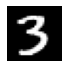

In [16]:
show_image(three_tensors[1]);
# sanity check

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape
# turn into tensors for blazingly fast torch stuff
# elementwise turn into float (so averaging is better)
# elementwise divide by 255 so each pixel is btn. 0 and 1

torch.Size([6131, 28, 28])

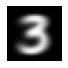

In [21]:
mean3 = stacked_threes.mean(0)
show_image(mean3);
# print(mean3)